Analytical Question

1.What are the primary factors contributing to economic disparities among different demographic groups, and how do these disparities vary across regions or countries?

2.How do access to economic opportunities and social services vary across different demographic groups?


In [1]:
from google.colab import files

In [2]:
file = files.upload()

Saving inequality new.csv to inequality new.csv


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('inequality new.csv', encoding='ascii')
print(df.head())
print(df.columns)

              Country  Year Pre tax Gini Pre tax Top 10% Pre tax Top 1%  \
0       East Asia wid  1820            0               0              0   
1  Eastern Europe wid  1820            0               0              0   
2          Europe wid  1820            0               0              0   
3               India  1820            0              48             16   
4   Latin America wid  1820            0               0              0   

  Pre tax Bottom 50% Pre tax Palma Ratio\n\n\n\n\n\n Post tax Gini  \
0                  0                               0             0   
1                  0                               0             0   
2                  0                               0             0   
3              17.15                               0             0   
4                  0                               0             0   

  Pre tax S80/S20 Ratio  
0                     0  
1                     0  
2                     0  
3                     0 

In [4]:
df


,Country,Year,Pre tax Gini,Pre tax Top 10%,Pre tax Top 1%,Pre tax Bottom 50%,Pre tax Palma Ratio\n\n\n\n\n\n,Post tax Gini,Pre tax S80/S20 Ratio
0,East Asia wid,1820,0,0,0,0,0,0,0
1,Eastern Europe wid,1820,0,0,0,0,0,0,0
2,Europe wid,1820,0,0,0,0,0,0,0
3,India,1820,0,48,16,17.15,0,0,0
4,Latin America wid,1820,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4581,United States,2021,577.273,45.6,19.03,13.82,5.187.713,46.167.776,27.825.687
4582,West Africa wid,2021,6.021.307,47.4,14,12.09,6.414.073,57.945.865,42.053.333
4583,West Asia wid,2021,648.471,55.75,23.73,11.57,760.573,58.611.864,4.534.437
4584,Western Europe wid,2021,47.202.283,35.33,11.469.999,19.56,27.862.775,36.769.336,19.189.394


The 'Pre tax Gini' column contains values with multiple decimal points and other formatting issues, which prevent them from being converted directly to floats. To proceed with the visualizations, I'll clean these values by removing extra decimal points and converting the data to numeric format.

Let's clean the data and then attempt the histogram visualization again.

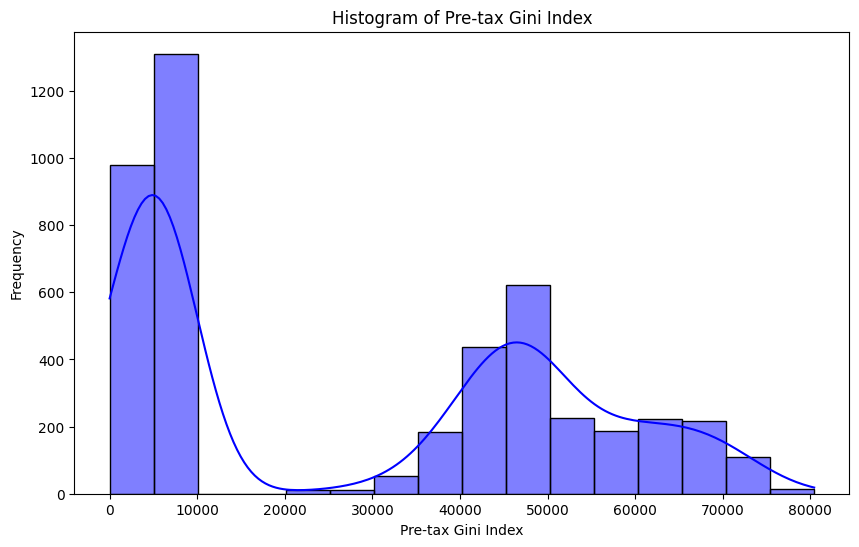

In [5]:
# Function to clean the 'Pre tax Gini' values
def clean_gini_values(value):
    if isinstance(value, str):
        # Remove all dots and convert the last dot to a decimal point
        parts = value.split('.')
        if len(parts) > 1:
            value = ''.join(parts[:-1]) + '.' + parts[-1]
    return value

# Apply the cleaning function to the 'Pre tax Gini' column
df['Pre tax Gini'] = df['Pre tax Gini'].apply(clean_gini_values).astype(float)

# Now, let's try the histogram again
plt.figure(figsize=(10, 6), facecolor='white')
sns.histplot(df['Pre tax Gini'], kde=True, color='blue')
plt.title('Histogram of Pre-tax Gini Index')
plt.xlabel('Pre-tax Gini Index')
plt.ylabel('Frequency')
plt.show()

<ipython-input-6-7703ada78d65>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_countries, x='Country', y='Pre tax Top 1%', palette='viridis')


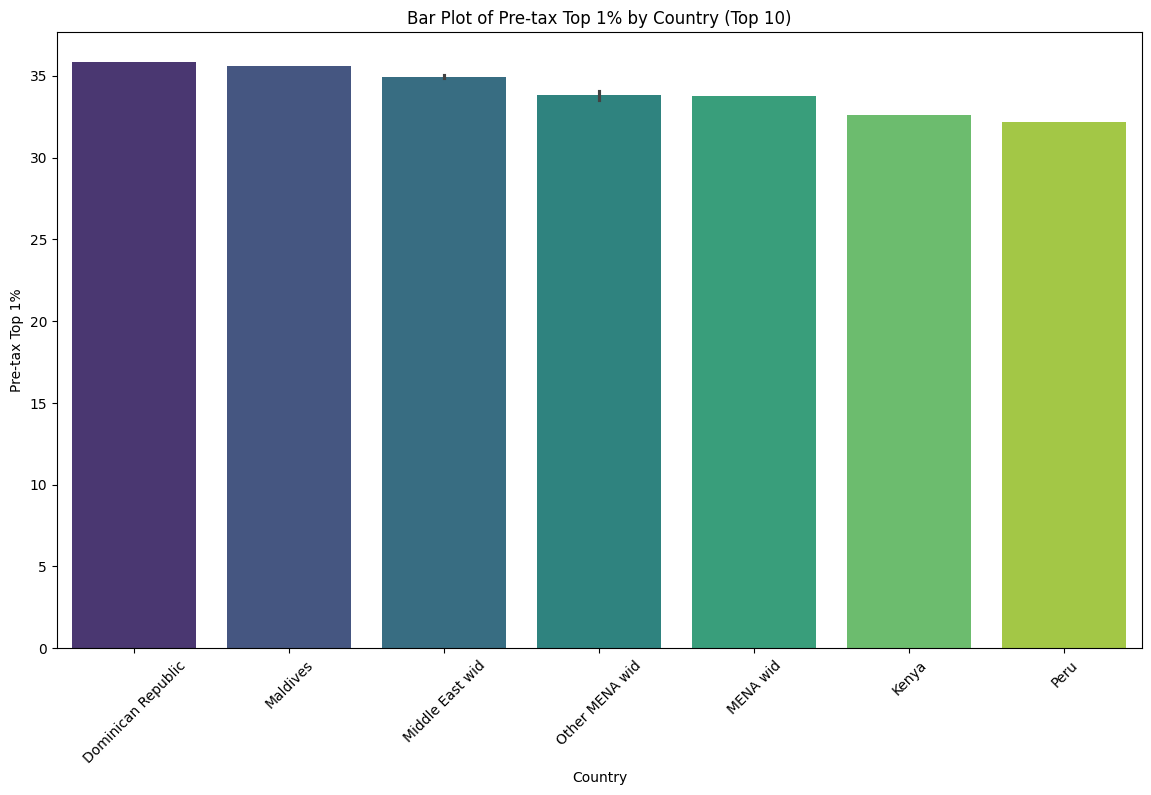

In [6]:
# Convert 'Pre tax Top 1%' to float, handling any non-numeric issues
df['Pre tax Top 1%'] = pd.to_numeric(df['Pre tax Top 1%'], errors='coerce')

# Sort the DataFrame by 'Pre tax Top 1%' column in descending order
df_sorted = df.sort_values(by='Pre tax Top 1%', ascending=False)

# Select only the top 10 countries
top_10_countries = df_sorted.head(10)

# Create the bar plot
plt.figure(figsize=(14, 8), facecolor='white')
sns.barplot(data=top_10_countries, x='Country', y='Pre tax Top 1%', palette='viridis')
plt.title('Bar Plot of Pre-tax Top 1% by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Pre-tax Top 1%')
plt.xticks(rotation=45)
plt.show()


In [7]:
# Sort the dataframe by 'Pre tax Top 1%' and get the top 5 countries
top_5_countries = df.sort_values(by='Pre tax Top 1%', ascending=False).head(5)
print(top_5_countries[['Country', 'Pre tax Top 1%']])

                 Country  Pre tax Top 1%
4404  Dominican Republic           35.87
2561            Maldives           35.61
739      Middle East wid           35.02
665      Middle East wid           34.89
751       Other MENA wid           34.06


<ipython-input-8-cffc991076c0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_10_countries, x='Country', y='Pre tax Top 1%', palette='coolwarm')


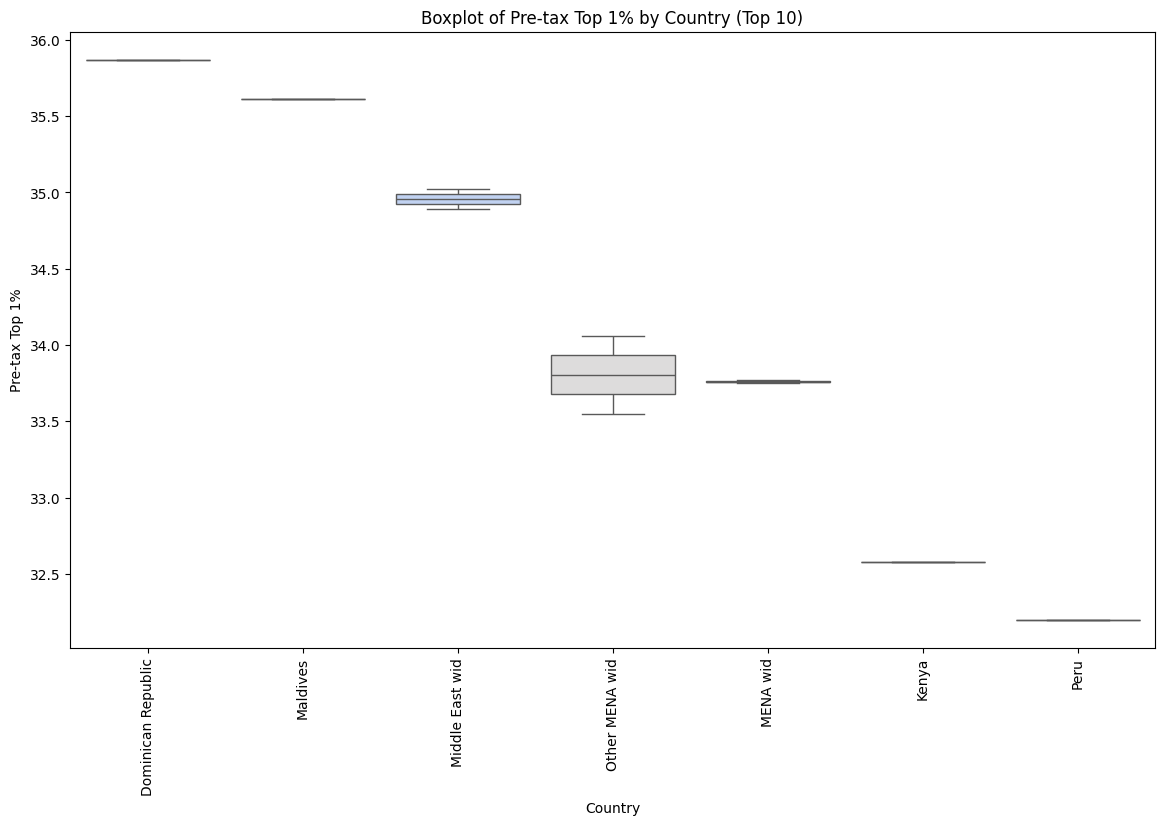

In [8]:

# Convert 'Pre tax Top 1%' to float, handling any non-numeric issues
df['Pre tax Top 1%'] = pd.to_numeric(df['Pre tax Top 1%'], errors='coerce')

# Sort the DataFrame by 'Pre tax Top 1%' column in descending order
df_sorted = df.sort_values(by='Pre tax Top 1%', ascending=False)

# Select only the top 10 countries
top_10_countries = df_sorted.head(10)

# Boxplot of Pre-tax Top 1% by Country
plt.figure(figsize=(14, 8), facecolor='white')
sns.boxplot(data=top_10_countries, x='Country', y='Pre tax Top 1%', palette='coolwarm')
plt.title('Boxplot of Pre-tax Top 1% by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Pre-tax Top 1%')
plt.xticks(rotation=90)
plt.show()



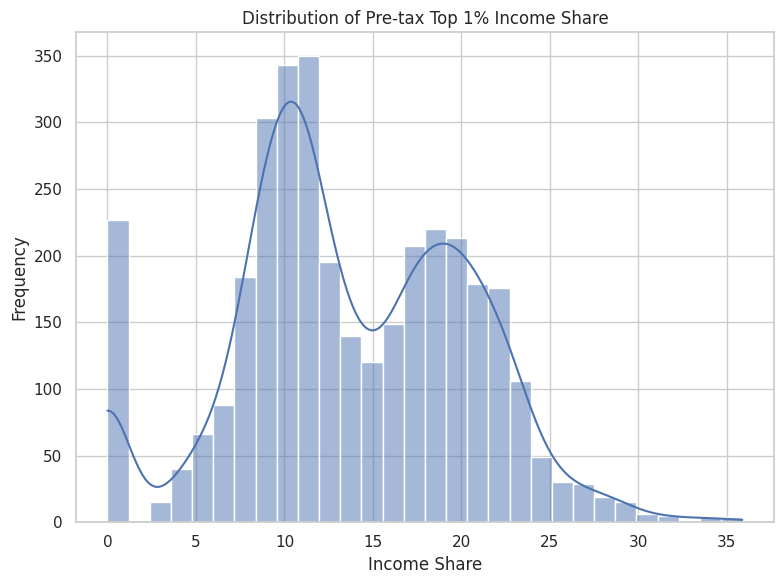

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Plot distribution of the income share data
plt.figure(figsize=(8, 6))
sns.histplot(df['Pre tax Top 1%'], bins=30, kde=True)
plt.title('Distribution of Pre-tax Top 1% Income Share')
plt.xlabel('Income Share')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()




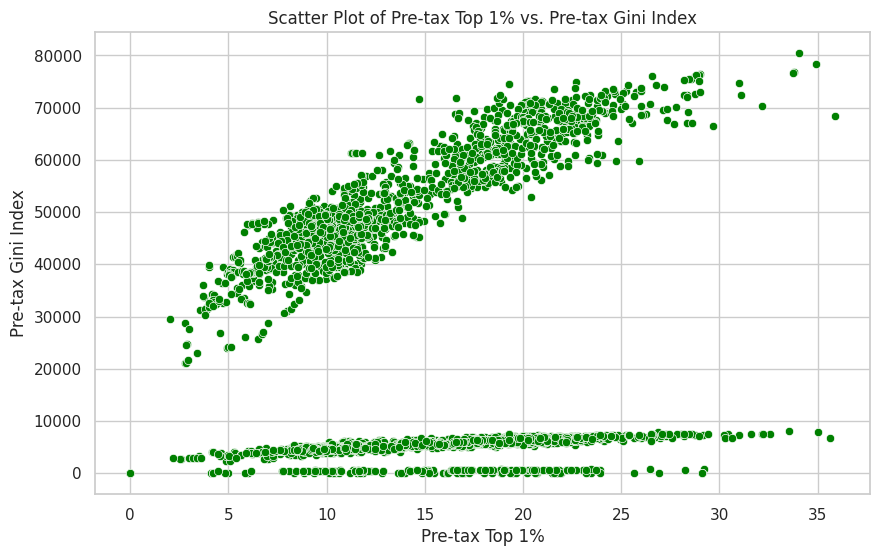

In [10]:
# Scatter Plot of Pre-tax Top 1% vs. Pre-tax Gini Index
plt.figure(figsize=(10, 6), facecolor='white')
sns.scatterplot(data=df, x='Pre tax Top 1%', y='Pre tax Gini', color='green')
plt.title('Scatter Plot of Pre-tax Top 1% vs. Pre-tax Gini Index')
plt.xlabel('Pre-tax Top 1%')
plt.ylabel('Pre-tax Gini Index')
plt.grid(True)
plt.show()

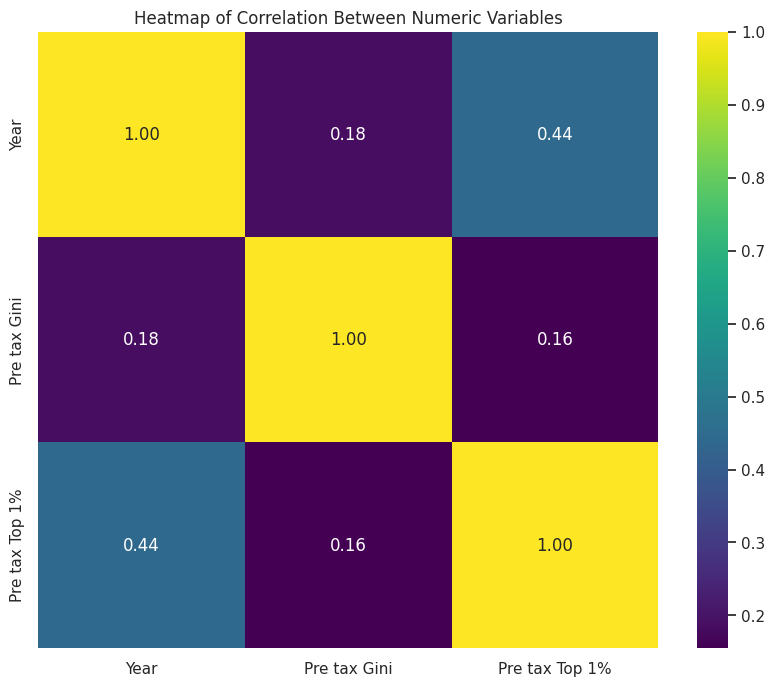

In [11]:
# Heatmap of Correlation Between All Numeric Variables
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8), facecolor='white')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis')
plt.title('Heatmap of Correlation Between Numeric Variables')
plt.show()

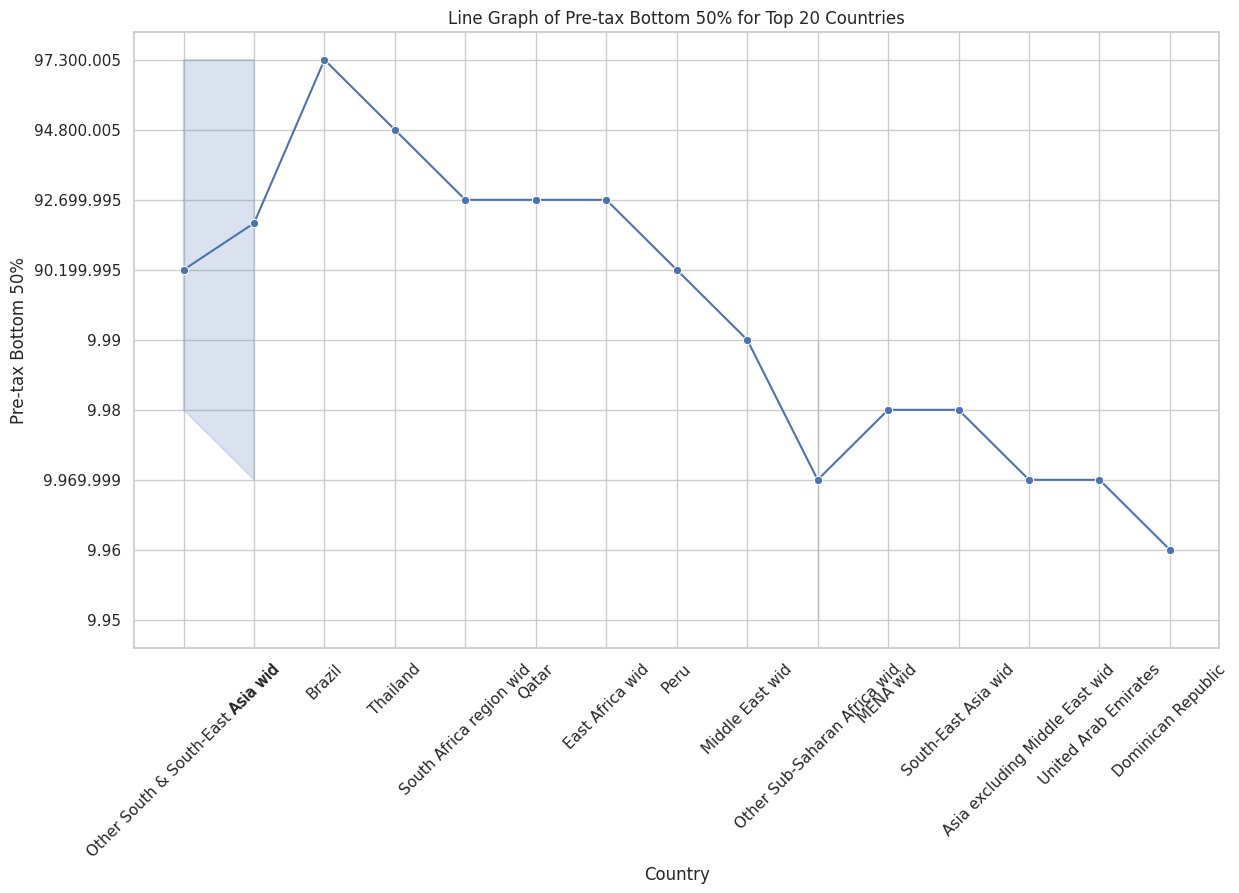

In [12]:
# First, we need to sort the countries based on the 'Pre tax Bottom 50%' and select the top 20
df_sorted = df.sort_values(by='Pre tax Bottom 50%', ascending=False).head(20)

#line graph for top 20 countries
plt.figure(figsize=(14, 8), facecolor='white')
sns.lineplot(data=df_sorted, x='Country', y='Pre tax Bottom 50%', marker='o', color='b')
plt.title('Line Graph of Pre-tax Bottom 50% for Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Pre-tax Bottom 50%')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [13]:
# Load the dataset and check for missing values
df = pd.read_csv('inequality new.csv')

# Display basic information and missing values
df_info = df.info()
missing_values = df.isnull().sum()

# Print the information and missing values
df_info
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4586 entries, 0 to 4585
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    4586 non-null   object
 1   Year                       4586 non-null   int64 
 2   Pre tax Gini               4586 non-null   object
 3   Pre tax Top 10%            4586 non-null   object
 4   Pre tax Top 1%             4586 non-null   object
 5   Pre tax Bottom 50%         4586 non-null   object
 6   Pre tax Palma Ratio





  4586 non-null   object
 7   Post tax Gini              4586 non-null   object
 8   Pre tax S80/S20 Ratio      4586 non-null   object
dtypes: int64(1), object(8)
memory usage: 322.6+ KB


Country                            0
Year                               0
Pre tax Gini                       0
Pre tax Top 10%                    0
Pre tax Top 1%                     0
Pre tax Bottom 50%                 0
Pre tax Palma Ratio\n\n\n\n\n\n    0
Post tax Gini                      0
Pre tax S80/S20 Ratio              0
dtype: int64

In [14]:
# One-hot encode the 'Country' column
df_encoded = pd.get_dummies(df, columns=['Country'])

# Display the head of the new dataframe to confirm encoding
df_encoded.head()

,Year,Pre tax Gini,Pre tax Top 10%,Pre tax Top 1%,Pre tax Bottom 50%,Pre tax Palma Ratio\n\n\n\n\n\n,Post tax Gini,Pre tax S80/S20 Ratio,Country_Afghanistan,Country_Africa wid,...,Country_Uzbekistan,Country_Vietnam,Country_West Africa wid,Country_West Asia wid,Country_Western Europe wid,Country_World,Country_Yemen,Country_Zambia,Country_Zanzibar,Country_Zimbabwe
0,1820,0,0,0,0,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1820,0,0,0,0,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1820,0,0,0,0,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1820,0,48,16,17.15,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1820,0,0,0,0,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# Inspecting unique values in the numerical columns to identify formatting issues
columns_to_inspect = ['Pre tax Top 10%', 'Pre tax Top 1%', 'Pre tax Bottom 50%',  'Post tax Gini', 'Pre tax S80/S20 Ratio']

# Display unique values for each column
df_unique_values = {col: df[col].unique() for col in columns_to_inspect}
df_unique_values

{'Pre tax Top 10%': array(['0', '48', '44.59', ..., '50.08', '45.6', '55.75'], dtype=object),
 'Pre tax Top 1%': array(['0', '16', '14.86', ..., '15.05', '23.92', '18.99'], dtype=object),
 'Pre tax Bottom 50%': array(['0', '17.15', '17.6', ..., '76.499.996', '13.93', '10.01'],
       dtype=object),
 'Post tax Gini': array(['0', '4.972.105', '5.001.426', ..., '58.611.864', '36.769.336',
        '6.226.775'], dtype=object),
 'Pre tax S80/S20 Ratio': array(['0', '13.227.373', '13.818.182', ..., '42.053.333', '4.534.437',
        '19.189.394'], dtype=object)}

In [16]:
# Function to clean and convert columns
def clean_convert(column):
    # Remove periods and convert to float
    return column.str.replace('.', '').astype(float)

# Apply the cleaning function to the affected columns
columns_to_clean = ['Pre tax Top 10%', 'Pre tax Top 1%', 'Pre tax Bottom 50%',  'Post tax Gini', 'Pre tax S80/S20 Ratio']
for col in columns_to_clean:
    df[col] = clean_convert(df[col])

# Display the cleaned data to confirm changes
df.head()

,Country,Year,Pre tax Gini,Pre tax Top 10%,Pre tax Top 1%,Pre tax Bottom 50%,Pre tax Palma Ratio\n\n\n\n\n\n,Post tax Gini,Pre tax S80/S20 Ratio
0,East Asia wid,1820,0,0.0,0.0,0.0,0,0.0,0.0
1,Eastern Europe wid,1820,0,0.0,0.0,0.0,0,0.0,0.0
2,Europe wid,1820,0,0.0,0.0,0.0,0,0.0,0.0
3,India,1820,0,48.0,16.0,1715.0,0,0.0,0.0
4,Latin America wid,1820,0,0.0,0.0,0.0,0,0.0,0.0


In [17]:
# Correcting the column names and retrying the scaling process
df.columns = [col.strip() for col in df.columns]  # Strip any extra spaces

# Retry encoding the 'Country' column with corrected column names
df_encoded = pd.get_dummies(df, columns=['Country'])

# Scale the numerical features using StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Columns to scale (excluding one-hot encoded and target variable)
columns_to_scale = ['Pre tax Top 10%', 'Pre tax Top 1%', 'Pre tax Bottom 50%', 'Post tax Gini', 'Pre tax S80/S20 Ratio']
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

# Display the head of the scaled dataframe
df_encoded.head()

,Year,Pre tax Gini,Pre tax Top 10%,Pre tax Top 1%,Pre tax Bottom 50%,Pre tax Palma Ratio,Post tax Gini,Pre tax S80/S20 Ratio,Country_Afghanistan,Country_Africa wid,...,Country_Uzbekistan,Country_Vietnam,Country_West Africa wid,Country_West Asia wid,Country_Western Europe wid,Country_World,Country_Yemen,Country_Zambia,Country_Zanzibar,Country_Zimbabwe
0,1820,0,-0.570103,-0.362639,-0.373220,0,-0.530274,-0.932896,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1820,0,-0.570103,-0.362639,-0.373220,0,-0.530274,-0.932896,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1820,0,-0.570103,-0.362639,-0.373220,0,-0.530274,-0.932896,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1820,0,-0.570101,-0.362638,-0.373132,0,-0.530274,-0.932896,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1820,0,-0.570103,-0.362639,-0.373220,0,-0.530274,-0.932896,False,False,...,False,False,False,False,False,False,False,False,False,False


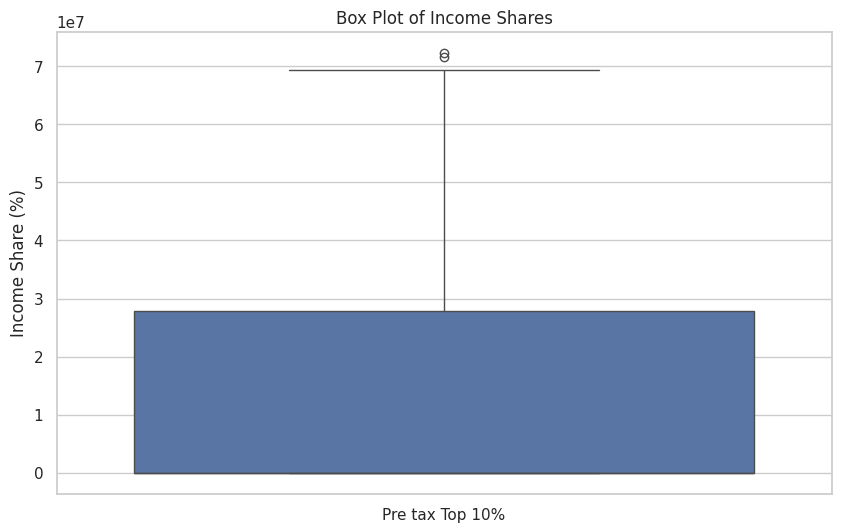

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a figure to hold the visualizations
plt.figure(figsize=(10, 6))

# Plot boxplots of the income share data
sns.boxplot(data=df[['Pre tax Top 10%']])
plt.title('Box Plot of Income Shares')
plt.ylabel('Income Share (%)')
plt.show()

Applying StandardScalar

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Selecting the columns to standardize
features = ['Pre tax Top 10%', 'Pre tax Top 1%','Pre tax Bottom 50%']

# Fit and transform the data
df_scaled = scaler.fit_transform(df[features])

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)
print(df_scaled.head())


   Pre tax Top 10%  Pre tax Top 1%  Pre tax Bottom 50%
0        -0.570103       -0.362639           -0.373220
1        -0.570103       -0.362639           -0.373220
2        -0.570103       -0.362639           -0.373220
3        -0.570101       -0.362638           -0.373132
4        -0.570103       -0.362639           -0.373220


PREDICTIVE ANALYSIS


StandardScaler is used to normalize the feature set. LinearRegression is a simple machine learning model suitable for linear relationships between variables. Mean Squared Error (MSE) is used to evaluate the model's performance, indicating the average squared difference between the estimated values and the actual value. This approach provides a basic predictive model. Depending on the complexity of the dataset and the specific requirements, more sophisticated models and feature engineering techniques might be necessary for better accuracy

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df_scaled[['Pre tax Top 1%', 'Pre tax Bottom 50%']]  # Features
y = df_scaled['Pre tax Top 10%']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [24]:
# Prepare the data
X = df_scaled[['Pre tax Top 1%',  'Pre tax Bottom 50%']]  # Features
y = df_scaled['Pre tax Top 10%']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.9628885902296614


1.	"What are the primary factors contributing to economic disparities among different demographic groups, and how do these disparities vary across regions or countries?"
2.	How do access to economic opportunities and social services vary across different demographic groups?
